In [2]:
%pip install pandas
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Fire Analysis Over the Years and Top Affected Regions

In this graph, I have plotted the number of fires over the years and the top regions where fires occurred.

/var/folders/b8/yc7s2y895f19q_yn9pml77280000gn/T/ipykernel_28020/2737452229.py:6: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_fires_20240912.csv', sep=';')


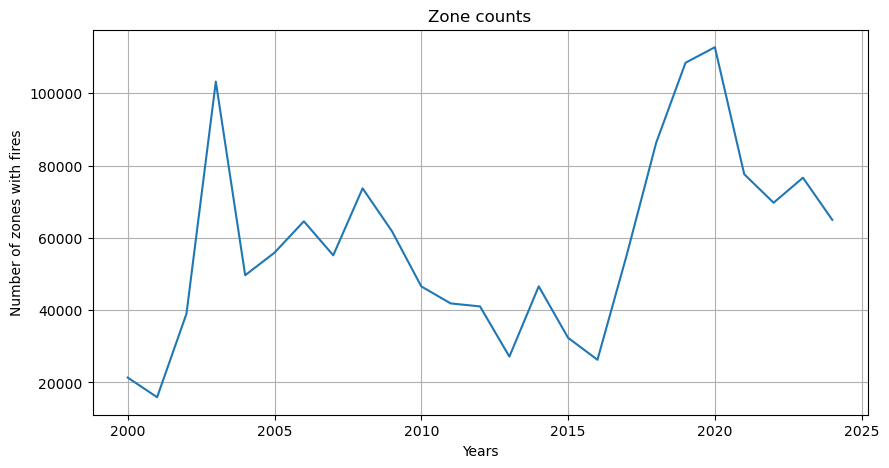

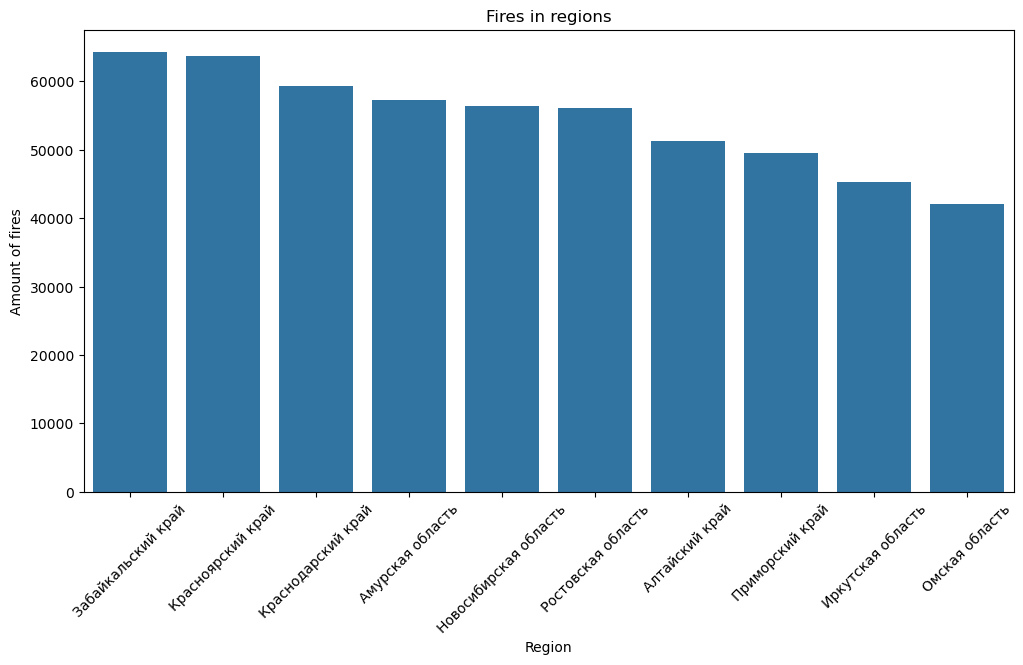

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

df = pd.read_csv('data_fires_20240912.csv', sep=';')
df.head()
df['date_beginning'] = pd.to_datetime(df['date_beginning'], format="%d.%m.%Y", errors='coerce')
df['date_end'] = pd.to_datetime(df['date_end'], format="%d.%m.%Y", errors='coerce')
df['duration'] = (df['date_end'] - df['date_beginning']).dt.days

m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)


for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Region: {row['region']}, State: {row['current_state']}",
        icon=folium.Icon(color="blue")
    ).add_to(m)


m.save("map.html")


plt.figure(figsize=(10, 5))
zone_counts = df.groupby('year')['zone_beginning'].count()
sns.lineplot(x=zone_counts.index, y=zone_counts.values)
plt.xlabel("Years")
plt.ylabel("Number of zones with fires")
plt.title("Zone counts")
plt.grid()
plt.show()


plt.figure(figsize=(12, 6))
region_counts = df['region'].value_counts().head(10)  
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.xlabel("Region")
plt.ylabel("Amount of fires")
plt.title("Fires in regions")
plt.xticks(rotation=45)
plt.show()


